# Processing of data gaps, coding of categorical features, data scaling.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Processing of data gaps

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
total_count = data.shape[0]

In [7]:
num_cols = []
for col in data.columns:
    # Number of empty values 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Column {}. Data type {}. Number of empty values {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


Column Glucose. Data type float64. Number of empty values 5, 0.65%.
Column BloodPressure. Data type float64. Number of empty values 35, 4.56%.
Column SkinThickness. Data type float64. Number of empty values 227, 29.56%.
Column Insulin. Data type float64. Number of empty values 374, 48.7%.
Column BMI. Data type float64. Number of empty values 11, 1.43%.


In [8]:
data_num = data[num_cols]

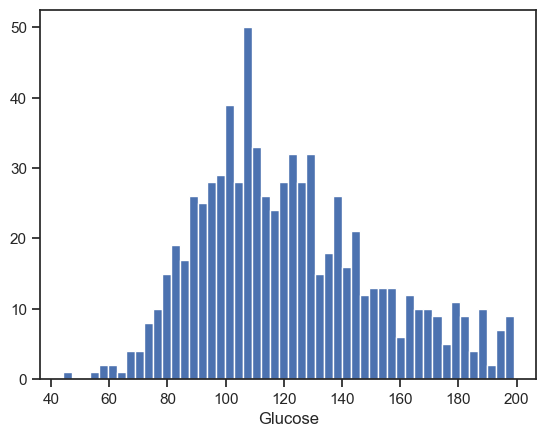

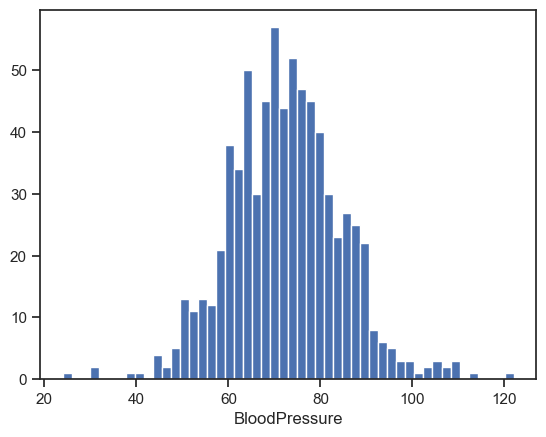

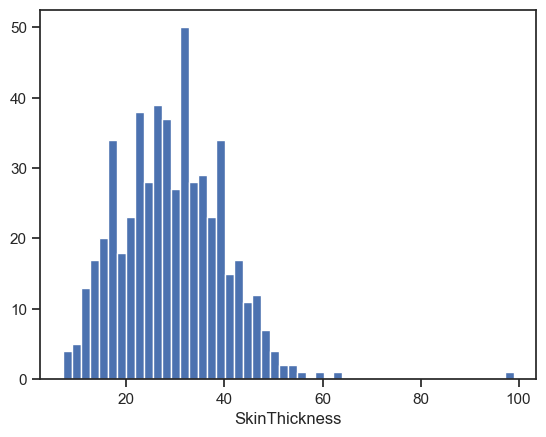

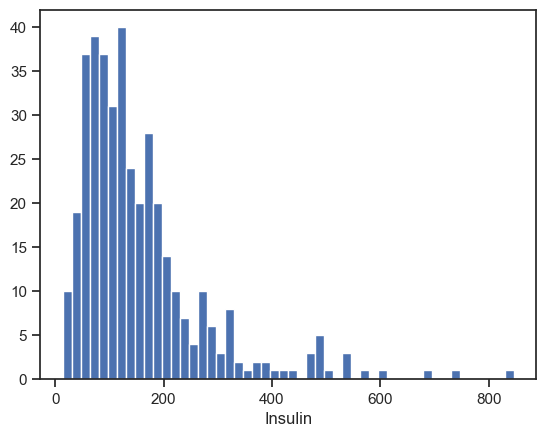

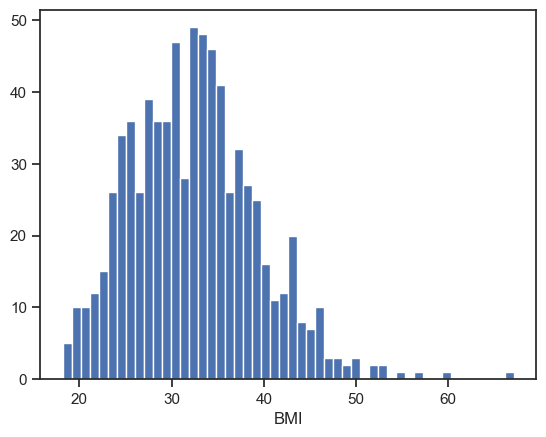

In [9]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [11]:
strategies=['mean', 'median', 'most_frequent']

In [12]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    dataset[column].fillna(value = filled_data[0], inplace = True)
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]


In [13]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,763.000000,733.000000,541.000000,394.000000,757.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464
std,30.535641,12.382158,10.476982,118.775855,6.924988
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.000000,64.000000,22.000000,76.250000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,141.000000,80.000000,36.000000,190.000000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [14]:
# since the samples resemble a normal distribution, assume that most of the gaps fall on the center and fill in the most_frequent value
test_num_impute_col(data, 'BMI', strategies[2])
test_num_impute_col(data, 'Glucose', strategies[2])
test_num_impute_col(data, 'BloodPressure', strategies[2])
test_num_impute_col(data, 'SkinThickness', strategies[2])
test_num_impute_col(data, 'Insulin', strategies[2])

C:\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\a

('Insulin', 'most_frequent', 374, 105.0, 105.0)

In [15]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.539062,72.295573,29.994792,130.932292,32.450911
std,30.490660,12.106756,8.886506,88.700443,6.875366
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.000000,64.000000,25.000000,105.000000,27.500000
50%,117.000000,72.000000,32.000000,105.000000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [16]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Transformation of categorical features into numerical ones


In [17]:
data = pd.read_csv('airlines_delay.csv')

In [18]:
data.shape


(539382, 8)

In [19]:
data.head

<bound method NDFrame.head of         Flight    Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class
0       2313.0  1296.0   141.0      DL         ATL       HOU          1      0
1       6948.0   360.0   146.0      OO         COS       ORD          4      0
2       1247.0  1170.0   143.0      B6         BOS       CLT          3      0
3         31.0  1410.0   344.0      US         OGG       PHX          6      0
4        563.0   692.0    98.0      FL         BMI       ATL          4      0
...        ...     ...     ...     ...         ...       ...        ...    ...
539377  6973.0   530.0    72.0      OO         GEG       SEA          5      1
539378  1264.0   560.0   115.0      WN         LAS       DEN          4      1
539379  5209.0   827.0    74.0      EV         CAE       ATL          2      1
539380   607.0   715.0    65.0      WN         BWI       BUF          4      1
539381  6377.0   770.0    55.0      OO         CPR       DEN          2      1

[539382 rows x 8 colu

In [20]:
data.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [21]:
data.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [22]:
cat_cols = []
for col in data.columns:
    # Number of empty values 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Column {}. Data type {}. Number of empty values {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


No omissions in the categorical data

In [23]:
cat_temp_data = data[['Airline']]
cat_temp_data.head()

,Airline
0,DL
1,OO
2,B6
3,US
4,FL


In [24]:
cat_temp_data['Airline'].unique()

array(['DL', 'OO', 'B6', 'US', 'FL', 'WN', 'CO', 'AA', 'YV', 'EV', 'XE',
       '9E', 'OH', 'UA', 'MQ', 'AS', 'F9', 'HA'], dtype=object)

# One-hot encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
cat_enc = pd.DataFrame({'c1':cat_temp_data['Airline'].unique()})
cat_enc

,c1
0,DL
1,OO
2,B6
3,US
4,FL
5,WN
6,CO
7,AA
8,YV
9,EV


In [27]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [28]:
cat_enc.shape

(18, 1)

In [29]:
cat_enc_ohe.shape

(18, 18)

In [30]:
cat_enc_ohe

<18x18 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [31]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [32]:
cat_enc.head(10)

,c1
0,DL
1,OO
2,B6
3,US
4,FL
5,WN
6,CO
7,AA
8,YV
9,EV


# Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler


In [34]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Length']])

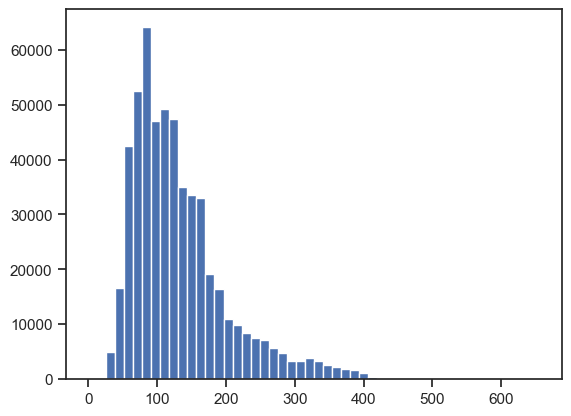

In [35]:
plt.hist(data['Length'], 50)
plt.show()

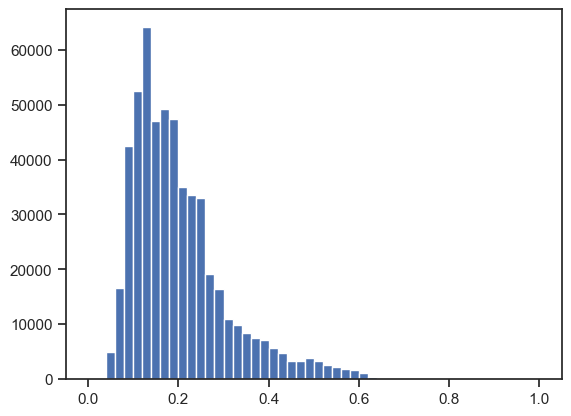

In [36]:
plt.hist(sc1_data, 50)
plt.show()